In [3]:
# imports

import os
import numpy as np
from tinygrad import Tensor, nn
import matplotlib.pyplot as plt

# setting tinygrad device to gpu since METAL is broken on older macs
os.environ['GPU'] = '1'

In [4]:
integer = Tensor([2])
print(integer.realize(), integer.ndim, integer.shape)

decimal = Tensor([3.14159])
print(decimal.realize())

<Tensor <UOp GPU (1,) int (<Ops.BUFFER: 7>, <buf real:True device:GPU size:1 dtype:dtypes.int>)> on GPU with grad None> 1 (1,)
<Tensor <UOp GPU (1,) float (<Ops.BUFFER: 7>, <buf real:True device:GPU size:1 dtype:dtypes.float>)> on GPU with grad None>


In [5]:
fibonacci = Tensor([1,1,2,3,5,8])
print(fibonacci.ndim, fibonacci.shape)

count_to_100 = Tensor.arange(start=0, stop=100, step=1)
print(count_to_100.ndim, count_to_100.shape)

1 (6,)
1 (100,)


In [6]:
### Defining higher-order Tensors ###

# define a 2-d tensor
matrix = Tensor([[1,2], [3,4]])
assert matrix.ndim == 2

# define a 4-d tensor
# Use Tensor.zeros to initialize a 4-d Tensor of zeros with size 10 x 3 x 256 x 256.
#   You can think of this as 10 images where each image is RGB 256 x 256.
images = Tensor.zeros(10,3,256,256)
assert images.ndim == 4
assert images.shape == (10,3,256,256)
print(f"images is a {images.ndim}-d Tensor with shape: {images.shape}")

images is a 4-d Tensor with shape: (10, 3, 256, 256)


In [7]:
row_vector = matrix[1]
column_vector = matrix[:, 1]
scalar = matrix[0, 1]

print(f"`row_vector`: {row_vector.numpy()}")
print(f"`column_vector`: {column_vector.numpy()}")
print(f"`scalar`: {scalar.numpy()}")

`row_vector`: [3 4]
`column_vector`: [2 4]
`scalar`: 2


In [8]:
# Create the nodes in the graph and initialize values
a = Tensor(15)
b = Tensor(61)

# Add them!
c1 = Tensor.add(a, b)
c2 = a + b  # tinygrad overrides the "+" operation so that it is able to act on Tensors
print(f"c1: {c1.numpy()}")
print(f"c2: {c2.numpy()}")

c1: 76
c2: 76


In [9]:
### Defining Tensor computations ###

# Construct a simple computation function
def func(a, b):
    #Define the operation for c, d, e
    a = Tensor(a)
    b = Tensor(b)
    c = Tensor.add(a, b)
    d = b - 1
    e = Tensor.mul(c, d)
    return e

In [10]:
# Consider example values for a,b
a, b = 1.5, 2.5
# Execute the computation
e_out = func(a, b)
print(f"e_out: {e_out}")
print(f"e_out: {e_out.realize()}")
print(f"e_out: {e_out.numpy()}")

e_out: <Tensor <UOp GPU () float (<Ops.MUL: 57>, None)> on GPU with grad None>
e_out: <Tensor <UOp GPU () float (<Ops.CONST: 82>, None)> on GPU with grad None>
e_out: 6.0


In [11]:
### Defining a dense layer ###

# num_inputs: number of input nodes
# num_outputs: number of output nodes
# x: input to the layer

class OurDenseLayer:
    def __init__(self, num_inputs, num_outputs):
        # Define and initialize parameters: a weight matrix W and bias b
        # Note that the parameter initialize is random!
        self.W = Tensor.randn(num_inputs, num_outputs)
        self.bias = Tensor.randn(num_outputs)

    def __call__(self, x):
        #define the operation for z (hint: use .matmul() method)
        z = x.matmul(self.W) + self.bias

        #define the operation for out (hint: use .sigmoid())
        y = z.sigmoid()
        return y

In [12]:
# Define a layer and test the output!
num_inputs = 2
num_outputs = 3
layer = OurDenseLayer(num_inputs, num_outputs)
x_input = Tensor([[1, 2.]])
y = layer(x_input)

print(f"input shape: {x_input.shape}")
print(f"output shape: {y.shape}")
print(f"output result: {y.numpy()}")

input shape: (1, 2)
output shape: (1, 3)
output result: [[0.655864   0.32749683 0.99188364]]


In [13]:
### Defining a neural network using the tinygrad .sequential method ###

# define the number of inputs and outputs
n_input_nodes = 2
n_output_nodes = 3

# Define the model
# Use the .sequential meth to define a neural network with a
# single linear (dense!) layer, followed by non-linearity to compute z
class Model:
    def __init__(self):
        self.lin = nn.Linear(n_input_nodes, n_output_nodes) # linear dense layer

    def __call__(self, x):
        return x.sequential([
            lambda x: self.lin(x),
            lambda x: x.sigmoid() # non-linear activation function
        ])

In [14]:
# Test the model with example input
x_input = Tensor([[1, 2.]])
model = Model()
y = model(x_input)

print(f"model weights: {model.lin.weight.numpy()}")
print(f"input shape: {x_input.shape}")
print(f"output shape: {y.shape}")
print(f"output result: {y.numpy()}")

model weights: [[-0.17208508 -0.26574346]
 [ 0.13424395  0.4505992 ]
 [-0.1578037   0.16829674]]
input shape: (1, 2)
output shape: (1, 3)
output result: [[0.2809306  0.5910083  0.46497723]]


In [21]:
### Defining a model using subclassing (which isnt a thing in tinygrad, so we skip this)

class LinearWithSigmoidActivation:
    def __init__(self, num_inputs, num_outputs):
        # define a model with a single Linear layer
        self.linear = nn.Linear(num_inputs, num_outputs) # linear layer

    # call the sigmoid method in the forward pass
    def __call__(self, inputs):
        linear_output = self.linear(inputs)
        output = linear_output.sigmoid()
        return output

In [23]:
# test model
n_input_nodes = 2
n_output_nodes = 3
model = LinearWithSigmoidActivation(n_input_nodes, n_output_nodes)
x_input = Tensor([[1, 2.]])
y = model(x_input)
print(f"input shape: {x_input.shape}")
print(f"output shape: {y.shape}")
print(f"output result: {y.numpy()}")

input shape: (1, 2)
output shape: (1, 3)
output result: [[0.79418314 0.19453847 0.64254946]]


In [26]:
### Custom behavior

class LinearButSometimesIdentity:
    def __init__(self, num_inputs, num_outputs):
        self.linear = nn.Linear(num_inputs, num_outputs)

    # Implement the behavior where the network outputs the input, unchanged,
    # under control of the isidentity argument
    def __call__(self, inputs, isidentity=False):
        if isidentity==True:
            return inputs
        else:
            linear_output = self.linear(inputs)
            return linear_output

In [27]:
# Test the IdentityModel
model = LinearButSometimesIdentity(num_inputs=2, num_outputs=3)
x_input = Tensor([[1, 2.]])

# pass the input into the model and call with and without the input identity option.'''
out_with_linear = model(x_input)

out_with_identity = model(x_input, isidentity=True)

print(f"input: {x_input.numpy()}")
print("Network linear output: {}; network identity output: {}".format(out_with_linear.numpy(), out_with_identity.numpy()))

input: [[1. 2.]]
Network linear output: [[-0.9087167   0.40461403 -0.18421459]]; network identity output: [[1. 2.]]


In [52]:
### Gradient computation ###

# y = x^2
# Example: x = 3.0
x = Tensor(3.0, requires_grad=True)
y = x ** 2
y.backward()  # Compute the gradient

dy_dx = x.grad.numpy()
print("dy_dx of y=x^2 at x=3.0 is: ", dy_dx)
assert dy_dx == 6.0

dy_dx of y=x^2 at x=3.0 is:  6.0


Initializing x=2.196676731109619
[-1.081994]
[-0.43279755]
[-0.17311907]
[-0.06924763]
[-0.027699]
[-0.0110796]
[-0.00443187]
[-0.00177269]
[-0.0007091]
[-0.00028367]
[-0.00011344]
[-4.5347217e-05]
[-1.8167497e-05]
[-7.2956086e-06]
[-2.861023e-06]
[-1.1444092e-06]
[-4.2915346e-07]
[-1.4305115e-07]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[

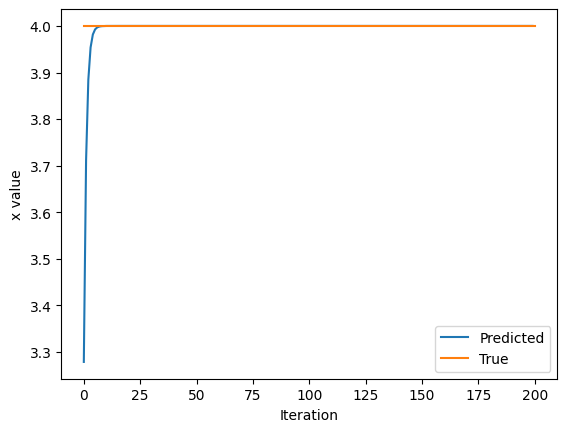

In [114]:
### Function minimization with autograd and gradient descent ###

# Initialize a random value for our intial x
x = Tensor.randn(1)
print(f"Initializing x={x.item()}")

learning_rate = 0.1 # Learning rate
history = []
x_f = Tensor(4.0)  # Target value

# We will run gradient descent for a number of iterations. At each iteration, we compute the loss,
#   compute the derivative of the loss with respect to x, and perform the update.
for i in range(200):
    x = Tensor(x.numpy(), requires_grad=True)

    # Compute the loss as the square of the difference between x and x_f
    loss = (( x - x_f ) ** 2).sum()

    # Backpropagate through the loss to compute gradients
    loss.backward()

    step_size = learning_rate * x.grad
    print(step_size.numpy())

    # Update x with gradient descent
    x = x.item() - learning_rate * x.grad

    history.append(x.item())

# Plot the evolution of x as we optimize toward x_f!
plt.plot(history)
plt.plot([0, 200], [x_f.numpy(), x_f.numpy()])
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')
plt.show()